## 📊 Proyecto: Predicción de Reclamaciones Fraudulentas en Seguros de Automóviles
Dataset: **AutoInsClaims.csv**

Este notebook replica la actividad guiada en IBM Watson Studio, adaptada a Python y Jupyter/Colab.

### ✅ Paso 1: Importar Librerías

In [19]:
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos estilo de gráficos
sns.set(style="whitegrid")


### ✅ Paso 2: Importación del Dataset

Cargamos el archivo `AutoInsClaims.csv` en un DataFrame de pandas.

In [20]:
# Cargar dataset (asegúrate de subir AutoInsClaims.csv en tu entorno)
#data = pd.read_csv("AutoInsClaims.csv")
data = pd.read_csv("AutoInsClaims.csv", low_memory=False)
print("Dimensiones:", data.shape)

# Mostramos primeras filas
data.head()

Dimensiones: (975, 38)


,HOUSEHOLD_ID,DRIVER_ID,POLICY_ID,CLAIM_ID,INCIDENT_CAUSE,DESCRIPTION,CLAIM_STATUS,ODOMETER_AT_LOSS,LOSS_EVENT_TIME,CLAIM_INIT_TIME,...,GENDER,BIRTHDATE,SSN,DRIVERS_LICENSE_ID,DRIVERS_LICENSE_EXPIRY,DRIVERS_LICENSE_STATE,DATE_AT_CURRENT_ADDRESS,CONTACT_NUMBER,EMAIL,COMMUTE_DISCOUNT
0,CH42335,XZJ2837,NW5567882,A-2017-UU907,3,NaN,1,157654.9,4/25/17,4/28/17,...,M,12/25/73,457-20-9007,X151-5971-1594,8/19/18,IL,4/16/99,634-603-0960,wdorau@freshmaail.com,0
1,IH49805,VVR6423,UR4864804,A-2018-FI481,3,NaN,3,226154.5,8/26/18,8/31/18,...,F,9/14/45,718-38-8987,K702-7678-1851,1/27/18,IL,6/9/11,827-916-0381,tmostrom@yahoot.com,0
2,AF28736,UQM2512,RR8595908,A-2016-ZG694,1,NaN,1,83968.6,1/7/16,1/11/16,...,F,5/16/88,076-62-7083,V549-5272-3181,11/19/19,IL,5/21/05,723-552-0479,esebranek@zohoo.com,0
3,EF53594,YDT5591,RN5640634,A-2016-NG783,1,NaN,1,309570.3,12/11/16,12/18/16,...,M,1/18/74,571-32-3662,Z350-2956-6553,5/16/19,IL,3/11/00,741-637-0631,dnickless@life.com,0
4,LD32277,ONM5465,YY1229530,A-2017-ZO863,3,NaN,3,136633.9,6/6/17,6/8/17,...,M,5/1/50,315-84-4443,E912-8544-3880,7/6/20,IL,7/4/12,735-427-0152,fliggan@mooosend.com,0


### ✅ Paso 3: Exploración y Limpieza de Datos

- Revisamos la estructura del dataset.
- Eliminamos columnas identificadoras y vacías.
- Aseguramos tipos de datos correctos.

#### Identificación Automática de Columnas para desechar

Antes de eliminar manualmente columnas, podemos usar Python para detectar:
- Columnas **identificadores únicos** (cada fila tiene un valor distinto).
- Columnas **vacías o casi vacías** (alto porcentaje de nulos).
- Columnas con **baja variabilidad** (todos los valores iguales).


In [21]:
# Número de filas
n_rows = len(data)

# Identificadores únicos (tantos valores únicos como filas)
unique_id_cols = [col for col in data.columns if data[col].nunique() == n_rows]

# Columnas vacías o casi vacías (>90% nulos)
null_percentage = data.isnull().mean() * 100
empty_cols = null_percentage[null_percentage > 90].index.tolist()

# Columnas sin variabilidad (solo 1 valor único)
low_variance_cols = [col for col in data.columns if data[col].nunique() <= 1]

print("Identificadores únicos:", unique_id_cols)
print("Columnas vacías:", empty_cols)
print("Columnas sin variabilidad:", low_variance_cols)


Identificadores únicos: ['HOUSEHOLD_ID', 'DRIVER_ID', 'POLICY_ID', 'CLAIM_ID', 'ODOMETER_AT_LOSS', 'PRIMARY_DRIVER_ID', 'PLATE', 'SSN', 'DRIVERS_LICENSE_ID', 'CONTACT_NUMBER', 'EMAIL']
Columnas vacías: ['DESCRIPTION']
Columnas sin variabilidad: ['DESCRIPTION', 'DRIVERS_LICENSE_STATE']


In [22]:
# Revisamos estructura y tipos de datos
data.info()

# Eliminamos columnas no útiles (identificadores únicos, vacías - según actividad guiada)
cols_to_drop = [
    "HOUSEHOLD_ID", "DRIVER_ID", "POLICY_ID", "CLAIM_ID",
    "PRIMARY_DRIVER_ID", "DESCRIPTION", "DRIVERS_LICENSE_ID"
]
data_clean = data.drop(columns=[c for c in cols_to_drop if c in data.columns])

# Verificamos nuevamente
#data_clean.info()
print("Dimensiones después de limpieza:", data_clean.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   HOUSEHOLD_ID             975 non-null    object 
 1   DRIVER_ID                975 non-null    object 
 2   POLICY_ID                975 non-null    object 
 3   CLAIM_ID                 975 non-null    object 
 4   INCIDENT_CAUSE           975 non-null    int64  
 5   DESCRIPTION              0 non-null      float64
 6   CLAIM_STATUS             975 non-null    int64  
 7   ODOMETER_AT_LOSS         975 non-null    float64
 8   LOSS_EVENT_TIME          975 non-null    object 
 9   CLAIM_INIT_TIME          975 non-null    object 
 10  POLICE_REPORT            975 non-null    int64  
 11  CLAIMS_AT_LOSS_DATE      975 non-null    int64  
 12  LOSS_LOCATION_LAT        975 non-null    float64
 13  LOSS_LOCATION_LONG       975 non-null    float64
 14  CLAIM_AMOUNT             9

### ⏱ Conversión de Tipos de Datos (Fechas)

In [23]:
for col in ["LOSS_EVENT_TIME", "CLAIM_INIT_TIME"]:
    if col in data_clean.columns:
        data_clean[col] = pd.to_datetime(data_clean[col], errors="coerce")
data_clean.info()

C:\Users\KEILY\AppData\Local\Temp\ipykernel_1612\1409374767.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_clean[col] = pd.to_datetime(data_clean[col], errors="coerce")
C:\Users\KEILY\AppData\Local\Temp\ipykernel_1612\1409374767.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_clean[col] = pd.to_datetime(data_clean[col], errors="coerce")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   INCIDENT_CAUSE           975 non-null    int64         
 1   CLAIM_STATUS             975 non-null    int64         
 2   ODOMETER_AT_LOSS         975 non-null    float64       
 3   LOSS_EVENT_TIME          975 non-null    datetime64[ns]
 4   CLAIM_INIT_TIME          975 non-null    datetime64[ns]
 5   POLICE_REPORT            975 non-null    int64         
 6   CLAIMS_AT_LOSS_DATE      975 non-null    int64         
 7   LOSS_LOCATION_LAT        975 non-null    float64       
 8   LOSS_LOCATION_LONG       975 non-null    float64       
 9   CLAIM_AMOUNT             975 non-null    float64       
 10  FLAG_FOR_FRAUD_INV       975 non-null    int64         
 11  START_DATE               975 non-null    object        
 12  EXPIRY_DATE              975 non-nul

### 💾 Guardar Refinamiento 1

In [24]:
data_clean.to_csv("AutoInsClaims_shaped.csv", index=False)
print("Archivo guardado: AutoInsClaims_shaped.csv")

Archivo guardado: AutoInsClaims_shaped.csv


### ✅ Paso 4: Segundo Refinamiento - Variable Derivada

Creamos la columna `EXCESSIVE_CLAIM_AMOUNT` para validar la hipótesis:
- 1 si `CLAIM_AMOUNT > 10000`
- 0 en caso contrario

In [25]:
def clean_amount(x):
    if pd.isnull(x):
        return np.nan
    s = str(x).strip()
    s = s.replace("$","").replace(",","").replace(" ","")
    s = s.replace("(","-").replace(")","")
    try:
        return float(s)
    except:
        return np.nan

if "CLAIM_AMOUNT" in data_clean.columns:
    data_clean["CLAIM_AMOUNT"] = data_clean["CLAIM_AMOUNT"].map(clean_amount)

data_clean["EXCESSIVE_CLAIM_AMOUNT"] = (data_clean["CLAIM_AMOUNT"] > 10000).astype(int)
data_clean[["CLAIM_AMOUNT","EXCESSIVE_CLAIM_AMOUNT"]].head()

,CLAIM_AMOUNT,EXCESSIVE_CLAIM_AMOUNT
0,35765.0,1
1,1909.0,0
2,25730.0,1
3,40880.0,1
4,2130.0,0


### 💾 Guardar Refinamiento 2

In [26]:
data_clean.to_csv("AutoInsClaims_refined.csv", index=False)
print("Archivo guardado: AutoInsClaims_refined.csv")
#AutoInsClaims_shaped_shaped.csv

Archivo guardado: AutoInsClaims_refined.csv


### ✅ Paso 5: Visualización de Datos

Ahora usamos el dataset refinado para validar la hipótesis, generamos la img de Visualización.

- **Eje X:** EXCESSIVE_CLAIM_AMOUNT
- **Eje Y:** CLAIM_AMOUNT
- **Color:** FLAG_FOR_FRAUD_INV

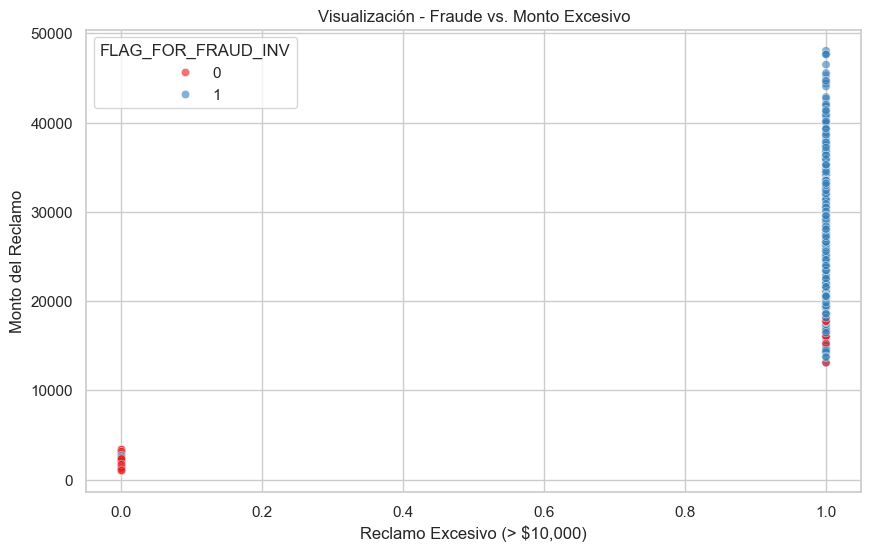

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=data_clean,
    x="EXCESSIVE_CLAIM_AMOUNT",
    y="CLAIM_AMOUNT",
    hue="FLAG_FOR_FRAUD_INV",
    alpha=0.6,
    palette="Set1"
)
plt.title("Visualización - Fraude vs. Monto Excesivo")
plt.xlabel("Reclamo Excesivo (> $10,000)")
plt.ylabel("Monto del Reclamo")
plt.savefig("Visualización - Fraude vs. Monto Excesivo.png", dpi=300, bbox_inches="tight")
plt.show()


### ✅ Paso 6: Conclusiones

- La visualización está basada en el dataset refinado, tal como especifíca la guía de Watson. Se observa que:
  * Hay fraudes en reclamos menores a $10,000.
  * También hay fraudes en reclamos mayores, pero no todos.
- La hipótesis se valida parcialmente, tal como se indica en el documento.

# ✅ Paso 7 Fase de Predicción

In [31]:
#Importaciones para el Modelo Predictivo

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [32]:
# 1) Crear variable de diferencia de tiempo en horas
data_clean["TIME_DIFF_HOURS"] = (
    (data_clean["CLAIM_INIT_TIME"] - data_clean["LOSS_EVENT_TIME"])
    .dt.total_seconds() / 3600
)

### Convertir variables categóricas a numéricas

In [35]:
# 2) Selección de variables predictoras
features = ["EXCESSIVE_CLAIM_AMOUNT", "POLICE_REPORT", "INCIDENT_CAUSE", "TIME_DIFF_HOURS"]

# Convertir variables categóricas a numéricas
df_model = data_clean[features + ["FLAG_FOR_FRAUD_INV"]].dropna().copy()
for col in ["POLICE_REPORT", "INCIDENT_CAUSE"]:
    if df_model[col].dtype == "object":
        df_model[col] = LabelEncoder().fit_transform(df_model[col])

X = df_model[features]
y = df_model["FLAG_FOR_FRAUD_INV"]

In [45]:
print("Features:\n", X)
print("\nFLAG_FOR_FRAUD_INV\n", y)

Features:
      EXCESSIVE_CLAIM_AMOUNT  POLICE_REPORT  INCIDENT_CAUSE  TIME_DIFF_HOURS
0                         1              1               3             72.0
1                         0              0               3            120.0
2                         1              0               1             96.0
3                         1              0               1            168.0
4                         0              0               3             48.0
..                      ...            ...             ...              ...
970                       1              1               3             48.0
971                       0              0               1            168.0
972                       1              1               1            288.0
973                       0              0               2            264.0
974                       0              1               2             96.0

[975 rows x 4 columns]

FLAG_FOR_FRAUD_INV
 0      1
1      0
2      1
3    

In [46]:
# 3) Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [49]:
# 4) Entrenar modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [50]:
# 5) Evaluación del modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       171
           1       0.94      0.91      0.93       122

    accuracy                           0.94       293
   macro avg       0.94      0.93      0.94       293
weighted avg       0.94      0.94      0.94       293

[[164   7]
 [ 11 111]]


## Graficamos lo resultados

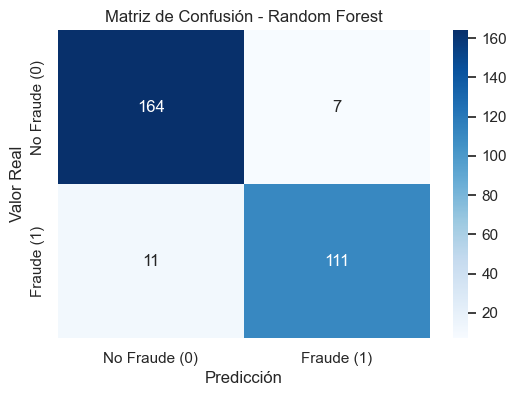

In [51]:
# 1) Matriz de Confusión
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Fraude (0)", "Fraude (1)"],
            yticklabels=["No Fraude (0)", "Fraude (1)"])
plt.title("Matriz de Confusión - Random Forest")
plt.ylabel("Valor Real")
plt.xlabel("Predicción")
plt.savefig("Matriz de Confusión - Random Forest.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
# 2) Métricas (Precisión, Recall, F1-score) en gráfico de barras
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred)
}

plt.figure(figsize=(6,4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")
plt.ylim(0,1)
plt.title("Métricas de Evaluación - Random Forest")
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=10)
plt.savefig("Métricas de Evaluación - Random Forest.png", dpi=300, bbox_inches="tight")
plt.show()

                  Feature  Importance
0  EXCESSIVE_CLAIM_AMOUNT    0.845246
3         TIME_DIFF_HOURS    0.065064
1           POLICE_REPORT    0.054244
2          INCIDENT_CAUSE    0.035446


C:\Users\KEILY\AppData\Local\Temp\ipykernel_1612\1987159719.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")


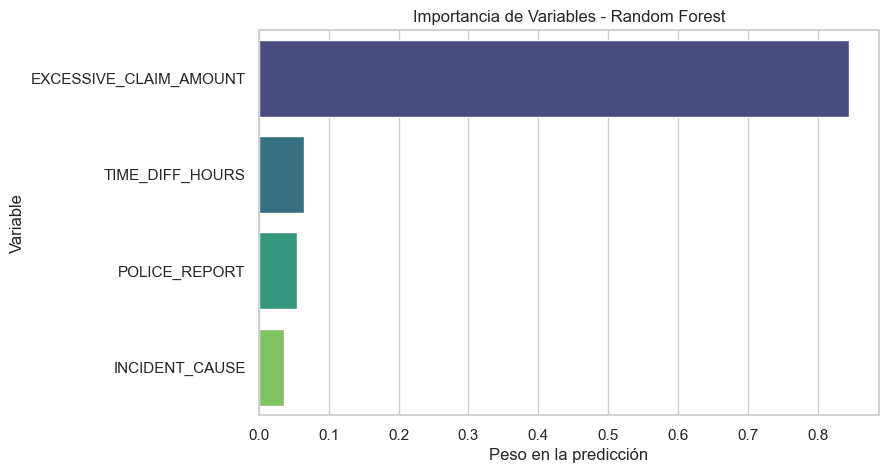

In [55]:
## ✅ Paso 9: Importancia de Variables en el Modelo Random Forest

# Extraer importancia de características
importances = model.feature_importances_
feature_names = X.columns

# Crear DataFrame ordenado
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Mostrar tabla
print(feat_imp)

# Graficar importancia
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")
plt.title("Importancia de Variables - Random Forest")
plt.xlabel("Peso en la predicción")
plt.ylabel("Variable")
plt.show()


## 🔎 Resumen de resultados
- Alto desempeño global

- Accuracy y F1-score ≈ 0.94, con buen balance entre precisión y recall → el modelo detecta la mayoría de fraudes sin comprometer excesivamente a clientes legítimos.

- Buen rendimiento por clase, con ligera debilidad en fraudes

  * No Fraude (0): casi todos correctamente clasificados (Recall 0.96).

  * Fraude (1): precisión sólida (0.94), pero pierde ~9% de casos (falsos negativos), lo que implica riesgo financiero residual.

- Errores residuales manejables pero críticos

  * 7 falsos positivos: pocos clientes legítimos afectados.

  * 11 falsos negativos: fraudes no detectados → principal área a mejorar, ya que impactan directamente en pérdidas económicas.

## Recomendaciones Clave

- Optimizar la sensibilidad del modelo

  * Ajustar el umbral de decisión para detectar más fraudes (aunque implique más revisiones manuales).

- Ampliar y enriquecer las variables

  * Incorporar más señales (tiempos, historial del cliente, contexto externo) para reducir falsos negativos y fortalecer la detección de fraudes complejos.

- Usar el modelo como sistema de apoyo, no de decisión final

  *Implementarlo como herramienta de alerta temprana, donde los reclamos sospechosos sean revisados por analistas antes de una resolución definitiva.